# <div align='center'> <font color='red'> Bolum 8- Karar Destek Makinalari
# <div align='center'> <font color='red'>    ODEV 

İkinci proje olan regresyon projesinde ve üçüncü proje olan sınıflandırma projesinde kullandığınız veri kümelerini tekrar kullanarak, SVM ile regresyon ve sınıflandırma modelleri oluşturun ve bu modeller için en uygun parametre değerlerini belirleyin. En ideal parametreyi bulmak için daha önceki bölümde öğrendiğiniz çapraz doğrulama metotlarını kullanabilirsiniz.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 1.4. Kernel Hilesi

Çok değişkenli gerçek veriler ile SVM çalıştırmak istediğimizde, çok büyük sayıda özellik çok yüksek boyutta uzaya neden olacaktır. Bu şekilde verileri dönüştürmeye çalışmak, pratikte daha çok işlemci ve daha çok hafıza kaynağı gerektirecektir. Gerçek veriler ile çalıştığımızda bu durum, dönüşümü yapmamızı imkansız hale getirecektir.

Peki verilerimizi yüksek boyutlu uzaya çevirmeden yüksek boyutlu optimum hiperdüzlemi bulabilir miyiz? Evet bunu Kernel Hilesi adı verilen işlem ile yapabiliriz. Kernel hilesi araştırmamızı yüksek boyutlu hiper düzlem sınırlarındaki pratik imkansızlıklardan çok daha makul işlem gerektiren bir göreve dönüştürür. 

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

In [7]:
df1 = pd.read_csv('data/wine.csv')
df1.head()

X = df1.drop(['quality_range'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df1['quality_range']

X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=40)

In [8]:
from sklearn.svm import SVC #SVC((support vector classifier))

#C=1-->Default Penalty/Default Tolerance
#C=0.01-->Less Penalty/More Tolearance
svc = SVC(kernel='linear', C=1) 
svc.fit(X_eğitim, y_eğitim)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
from sklearn.metrics import accuracy_score


y_tahmin = svc.predict(X_test)
print("support vector classifier Doğruluk Değeri : {:.2f}".format(accuracy_score(y_test, y_tahmin)))

Rastgele Orman Doğruluk Değeri : 0.72


[ 1.24216452e-03  1.77249383e+00 -5.48743533e-01 -4.18030581e+01
  3.02655187e+00  1.14328269e+00 -1.43482378e+00  2.80458201e-01
 -1.09407406e-01 -9.73662467e-02 -1.27541073e+00  2.18064440e+01
  1.27206301e+01]


TypeError: unhashable type: 'slice'

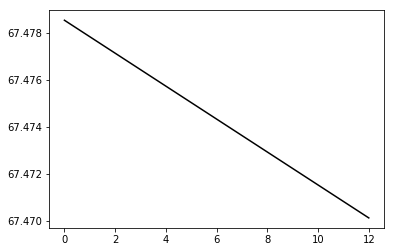

In [49]:
w = svc.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - svc.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(min(X[:, 0]), max(X[:, 1]), c = y)
plt.legend()
plt.show()

dummy olmadan map ile deneme

In [10]:
df1 = pd.read_csv('data/wine.csv')

df1.type = df1.type.map({'white':1, 'red':0})
X = df1.drop(['quality_range'], axis=1)

y = df1['quality_range']

X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=40)

In [11]:
svc = SVC(kernel='linear', C=1) #C is a valuation of "how badly" you want to properly classify, or fit, everything. 
svc.fit(X_eğitim, y_eğitim)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
y_tahmin = svc.predict(X_test)
print("SVC Doğruluk Değeri : {:.2f}".format(accuracy_score(y_test, y_tahmin)))

Rastgele Orman Doğruluk Değeri : 0.72


## 2.2. SVM(Support Vector Machine) ile Regresyon


SVM ile sınıflandırma yapmak için sklearn kütüphanesinin svm modülünde yeralan SVRyi kullanmaktayız.

Örnek olarak sklearn kütüphanesindeki ev fiyatları veri kümesini kullanacağız. Öncelikle veri kümesini import ederek X ve y değişkenlerine atalım.

Veri kümesini veri çerçevesine alalım ve eğitim ve test olarak bölelim.

In [13]:
from sklearn.metrics import mean_squared_error as MSE

In [15]:
df2 = pd.read_csv('data/LifeExpectancy.csv', index_col=0)

In [16]:
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(df2.drop('Life_Expectancy', axis=1), df2.Life_Expectancy, test_size=0.20, random_state=111)

In [20]:
from sklearn.svm import SVR

In [17]:
svr_reg = SVR(kernel='linear', C=1)
svr_reg.fit(X_eğitim, y_eğitim)
y_tahmin = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_tahmin)**(1/2)
print("RMSE değeri (Kernel = linear): {:.2f}".format(rmse_test))

RMSE değeri (Kernel = linear): 5.88


Oluşturduğumuz modelin rmse değerini 5.88 olarak bulduk.

## Kernel = RBF

This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

In [50]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [51]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

TypeError: unhashable type: 'slice'

In [55]:
gamma_listesi = [0.1, 1, 10, 100]


for i, gamma in enumerate(gamma_listesi):
    svc = SVC(kernel='rbf', gamma=gamma).fit(X, y)
    svc.fit(X, y)

## C=c

In [66]:
c_listesi = [0.1, 1, 10, 100, 1000, 10000]
   

for i, c in enumerate(c_listesi):
    svc = SVC(kernel='rbf', C=c).fit(X_eğitim, y_eğitim)
    y_tahmin=svc.fit(X_test)
    score = svc.score(X, y)
    if score > best_score:
        best_score = score
print('Highest Accuracy Score: ', best_score) 

ValueError: Unknown label type: 'continuous'

In [68]:
for C in np.arange(0.05, 2.05, 0.05):
    for gamma in np.arange(0.001, 0.101, 0.001):
        svc = SVC(kernel='rbf', gamma=gamma, C=C)
        svc.fit(X_eğitim, y_eğitim)
        score = svc.score(X_test, y_test)
        if score > best_score:
            best_score = score
print('Highest Accuracy Score: ', best_score) 

ValueError: Unknown label type: 'continuous'

## Degree Listeli

In [57]:
degree_listesi = [1, 2, 3, 4, 5, 6]
   
plt.figure(figsize=(15,10))
for i, degree in enumerate(degree_listesi):
    svc = SVC(kernel='poly', degree=degree).fit(X, y)
    svc.fit(X,y)

NameError: name 'fit' is not defined

<Figure size 1080x720 with 0 Axes>

## 2.3. SVM((support vector machine))'de parametre ayarlama

Support Vector Machine (the “road machine”) is responsible for finding the decision boundary to separate different classes and maximize the margin.
Son olarak SVM(support vector machine) ile model oluşturuken ayarlama yapabileceğimiz parametrelere bakalım. 

NameError: name 'plotSVC' is not defined

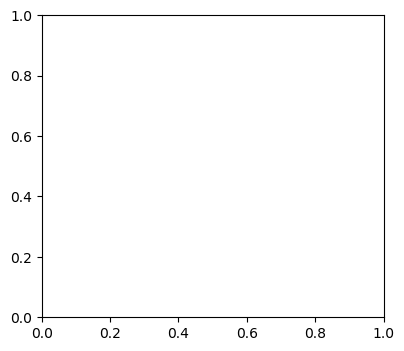

In [19]:
kernel_listesi = ['linear', 'rbf', 'poly']

plt.figure(figsize=(15,4), dpi=100)
for i, kernel in enumerate(kernel_listesi):
    svc = SVC(kernel=kernel).fit(X, y) #SVM((support vector machine))
    plt.subplot(1,3,i+1)
    plotSVC('kernel=' + str(kernel))
plt.show()

What **Kernel Trick** does is it utilizes existing features, applies some transformations, and creates new features. Those new features are the key for SVM to find the nonlinear decision boundary.
https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496